# Project : Analyzing FIFA 19 players Dataset

## Introduction
in this project i will be analyzing the data associated with FIFA 19 players , i will be interested in players details and  qualities in different ways and what affect them , and also comparisons between players 

### Questions :
### what is the distribution of wages and overall for players in fifa 19?
### what is the distribution of wages and overall for players in fifa 19 in small and big clubs ?
### what is the players Nationality distribution in fifa 19
### age effect on the value and wage of players ?
###  what is relation between player rating and his value and wage ?
###  relation between player position and different attributes ?
###  does african players are the fastest in fifa19 ?
###  what are the top 10 teams based on their average players rating?
### relationship between player age and potential within different overall values ?
### compare between players with same overall range and their wage in two different big clubs?

## importing the needed libraries

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

## Data gathering 
importing csv file which i used from this link https://www.kaggle.com/karangadiya/fifa19

In [108]:
df=pd.read_csv('FIFA19 - FIFA19.csv')
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


## Data Cleaning

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

### first of all we need to collect the columns that we are interested in that will help us answering our questions 

In [110]:
fifa19_df=df[['Age','Value','Wage','Overall','Club','Position','Nationality','GKReflexes','StandingTackle','SlidingTackle','Strength','Balance','ShortPassing','SprintSpeed','Acceleration','Dribbling','Finishing','Crossing','ShotPower','Potential']]
fifa19_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             18207 non-null  int64  
 1   Value           18207 non-null  object 
 2   Wage            18207 non-null  object 
 3   Overall         18207 non-null  int64  
 4   Club            17966 non-null  object 
 5   Position        18147 non-null  object 
 6   Nationality     18207 non-null  object 
 7   GKReflexes      18159 non-null  float64
 8   StandingTackle  18159 non-null  float64
 9   SlidingTackle   18159 non-null  float64
 10  Strength        18159 non-null  float64
 11  Balance         18159 non-null  float64
 12  ShortPassing    18159 non-null  float64
 13  SprintSpeed     18159 non-null  float64
 14  Acceleration    18159 non-null  float64
 15  Dribbling       18159 non-null  float64
 16  Finishing       18159 non-null  float64
 17  Crossing        18159 non-null 

### its obvious that we have null values at columns we are interested in like Club column so we will remove rows that contain null values 

In [111]:
fifa19_df=fifa19_df.dropna()
fifa19_df.isnull().sum()

Age               0
Value             0
Wage              0
Overall           0
Club              0
Position          0
Nationality       0
GKReflexes        0
StandingTackle    0
SlidingTackle     0
Strength          0
Balance           0
ShortPassing      0
SprintSpeed       0
Acceleration      0
Dribbling         0
Finishing         0
Crossing          0
ShotPower         0
Potential         0
dtype: int64

### its obvious that we need to change the type of each 'Value' and 'Wage' columns to int and replace K , M characters with their corresponding int value

In [112]:
fifa19_df.head(2)

,Age,Value,Wage,Overall,Club,Position,Nationality,GKReflexes,StandingTackle,SlidingTackle,Strength,Balance,ShortPassing,SprintSpeed,Acceleration,Dribbling,Finishing,Crossing,ShotPower,Potential
0,31,€110.5M,€565K,94,FC Barcelona,RF,Argentina,8.0,28.0,26.0,59.0,95.0,90.0,86.0,91.0,97.0,95.0,84.0,85.0,94
1,33,€77M,€405K,94,Juventus,ST,Portugal,11.0,31.0,23.0,79.0,70.0,81.0,91.0,89.0,88.0,94.0,84.0,95.0,94


### below is a function that extract the number corresponding to string in both 'Wage' and 'Value' columns

In [113]:
def get_num (mystring):
    output = mystring.replace('€', '')
    if 'M' in output:
        output = float(output.replace('M', ''))*1000000
    elif 'K' in output:
        output = float(output.replace('K', ''))*1000
    return int(output)


In [114]:
# by applying the function get_num() to every row in both 'Wage' and 'Value' columns
fifa19_df['Wage']=fifa19_df['Wage'].apply(lambda x: get_num(x))
fifa19_df['Value']=fifa19_df['Value'].apply(lambda x: get_num(x))

In [115]:
# checking that function worked right
fifa19_df['Wage'][0:3]

0    565000
1    405000
2    290000
Name: Wage, dtype: int64

In [116]:
fifa19_df['Value'][0:3]

0    110500000
1     77000000
2    118500000
Name: Value, dtype: int64

### now we need to convert the players attributes columns like Speed and Finishing to int

In [117]:
fifa19_df = fifa19_df.astype({"GKReflexes":'int32', "StandingTackle":'int32','SlidingTackle':'int32','Strength':'int32','Balance':'int32','ShortPassing':'int32','SprintSpeed':'int32','Acceleration':'int32','Dribbling':'int32','Finishing':'int32','Crossing':'int32','ShotPower':'int32'})
# checking that conversion is done

In [118]:
fifa19_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17918 entries, 0 to 18206
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             17918 non-null  int64 
 1   Value           17918 non-null  int64 
 2   Wage            17918 non-null  int64 
 3   Overall         17918 non-null  int64 
 4   Club            17918 non-null  object
 5   Position        17918 non-null  object
 6   Nationality     17918 non-null  object
 7   GKReflexes      17918 non-null  int32 
 8   StandingTackle  17918 non-null  int32 
 9   SlidingTackle   17918 non-null  int32 
 10  Strength        17918 non-null  int32 
 11  Balance         17918 non-null  int32 
 12  ShortPassing    17918 non-null  int32 
 13  SprintSpeed     17918 non-null  int32 
 14  Acceleration    17918 non-null  int32 
 15  Dribbling       17918 non-null  int32 
 16  Finishing       17918 non-null  int32 
 17  Crossing        17918 non-null  int32 
 18  ShotPo

## Exploratory data analysis

## Univariate Explorations

## what is the distribution of wages and overall for players in fifa 19

In [119]:
# creating a function that plots a customized histogram
def plot_hist(df,x,bins,xlabel,ylabel,title,xticks):
    plt.hist(data = df, x = x ,bins=bins);
    plt.xticks(xticks);
    plt.xlabel(xlabel)
    plt.ylabel(ylabel);
    plt.title(title);

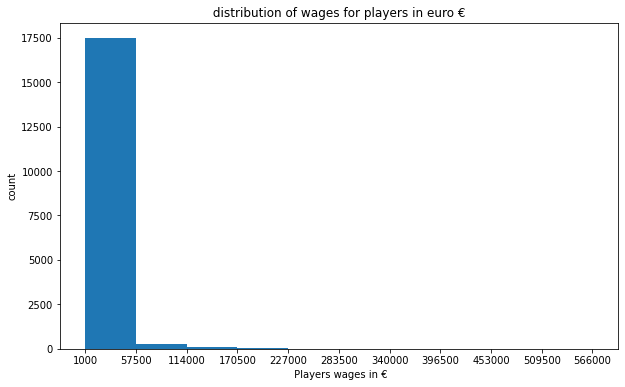

In [120]:
# distribution of wages
plt.figure(figsize=[10,6])
max_wage=fifa19_df['Wage'].max()
min_wage=fifa19_df['Wage'].min()
step=(max_wage/10)
bins = np.arange(min_wage,max_wage +step, step)
xticks=np.arange(min_wage,max_wage +step, step)

plot_hist(fifa19_df,'Wage',bins,' Players wages in €','count',' distribution of wages for players in euro € ',xticks)

### we can see that there is a huge wage margin that players with wages > 20000 doesnt even apear in the scale which makes sense because there only limited group of very big clubs in the world that gives very high wages for its world class players

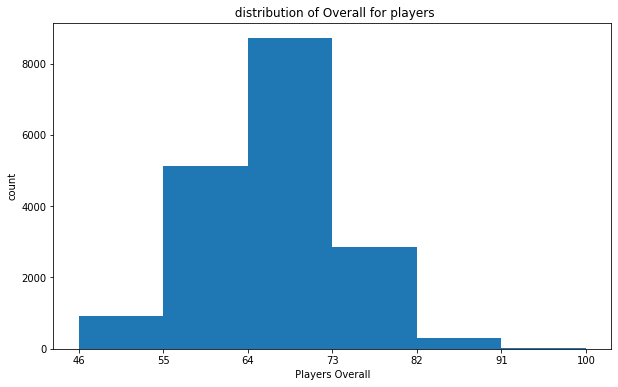

In [121]:
# distribution of overall
plt.figure(figsize=[10,6])
max_overall=fifa19_df['Overall'].max()
min_overall=fifa19_df['Overall'].min()
step=int(max_overall/10)
bins = np.arange(min_overall,max_overall +step, step)
xticks=np.arange(min_overall,max_overall +step, step)

plot_hist(fifa19_df,'Overall',bins,' Players Overall ','count',' distribution of Overall for players',xticks)





### we can see that most players have medium overall ( 65 - 73 ) and few players have very low or very high overall which makes sense

## what is the distribution of wages and overall for players in fifa 19 for small and big clubs

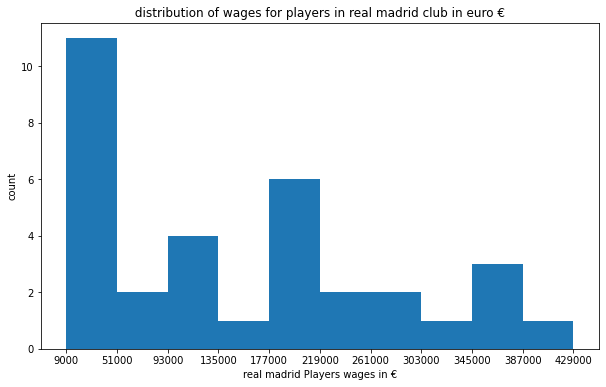

In [122]:
## for a big club like real madrid
plt.figure(figsize=[10,6])
df_realmadrid=fifa19_df[fifa19_df['Club']=='Real Madrid']

max_wage=df_realmadrid['Wage'].max()
min_wage=df_realmadrid['Wage'].min()
step=(max_wage/10)
bins = np.arange(min_wage,max_wage +step, step)
xticks=np.arange(min_wage,max_wage +step, step)

plot_hist(df_realmadrid,'Wage',bins,'real madrid Players wages in €','count',
          ' distribution of wages for players in real madrid club in euro € ',xticks)



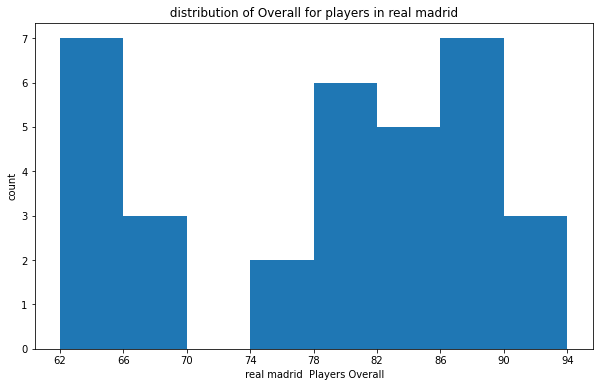

In [123]:
plt.figure(figsize=[10,6])
max_rate=int(df_realmadrid['Overall'].max())
min_rate=int(df_realmadrid['Overall'].min())
step=int(max_rate/20)
bins = np.arange(min_rate,max_rate +step, step)
xticks=np.arange(min_rate,max_rate +step, step)


plot_hist(df_realmadrid,'Overall',bins,' real madrid  Players Overall','count',
          ' distribution of Overall for players in real madrid ',xticks)

### there is a lot of differences between players wages which is normal because some players overall ranges from 62 to 90 which affects the wage throughout the distribution

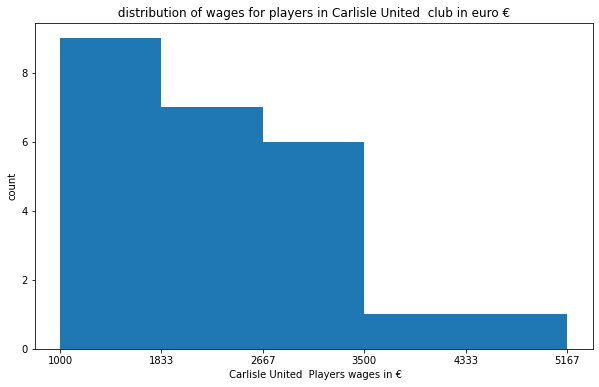

In [124]:
## for a small club like Carlisle United
plt.figure(figsize=[10,6])
df_Carlisle_United=fifa19_df[fifa19_df['Club']=='Carlisle United']

max_wage=df_Carlisle_United['Wage'].max()
min_wage=df_Carlisle_United['Wage'].min()
step=(max_wage/6)
bins = np.arange(min_wage,max_wage +step, step)
xticks=np.arange(min_wage,max_wage +step, step)
plot_hist(df_Carlisle_United,'Wage',bins,' Carlisle United  Players wages in €','count',
          ' distribution of wages for players in Carlisle United  club in euro € ',xticks)




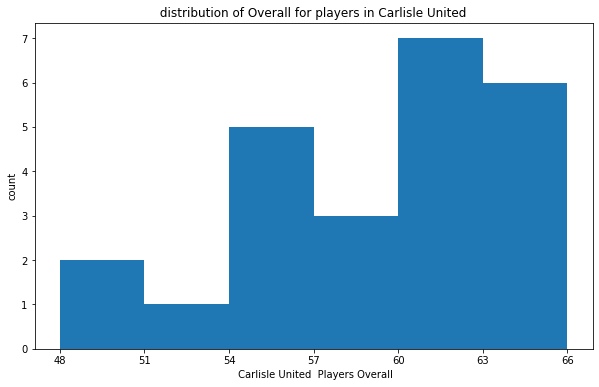

In [125]:
plt.figure(figsize=[10,6])
max_rate=int(df_Carlisle_United['Overall'].max())
min_rate=int(df_Carlisle_United['Overall'].min())
step=int(max_rate/20)
bins = np.arange(min_rate,max_rate +step, step)
xticks=np.arange(min_rate,max_rate +step, step)


plot_hist(df_Carlisle_United,'Overall',bins,' Carlisle United  Players Overall','count',
          ' distribution of Overall for players in Carlisle United ',xticks)



###  we can see a huge difference in wages and overall between big and small clubs

## what is the players Nationality distribution in fifa 19

In [126]:
nation_counts=fifa19_df['Nationality'].value_counts(ascending=False)
# getting the most frequent 10 nationalities
nation_counts10=nation_counts.nlargest(10,keep='first')
nation_counts10

England        1657
Germany        1195
Spain          1071
Argentina       935
France          911
Brazil          825
Italy           699
Colombia        616
Japan           478
Netherlands     452
Name: Nationality, dtype: int64

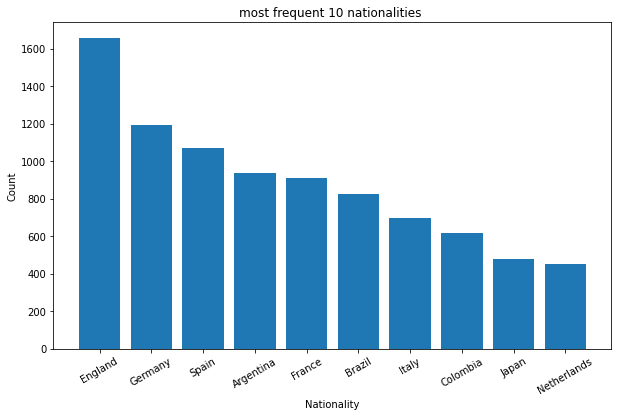

In [127]:
plt.figure(figsize=[10,6])
x=nation_counts10.index
y=nation_counts10
plt.bar(x,y)
plt.xlabel('Nationality')
plt.ylabel('Count');
plt.xticks(rotation=30);
plt.title('most frequent 10 nationalities ');

### we can see that england is the most frequent which makes sense because england has 4 divisions in fifa19

## Bivariate Explorations

## age effect on the value and wage of players ?

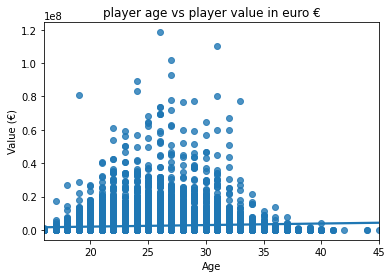

In [128]:
# first of all lets take a look at the age and player value using scatter plot
sb.regplot(data = fifa19_df, x = 'Age', y = 'Value');
plt.xlabel('Age')
plt.ylabel('Value (€)')
plt.title('player age vs player value in euro €');


### we can see that the relationship is very week 

In [129]:
# by calculating pearson correlation coeffecient
from scipy.stats import pearsonr
corr, _ = pearsonr(fifa19_df['Age'], fifa19_df['Value'])
corr

0.07727441154447073

### pearson correlation coeffecient is close to zero 

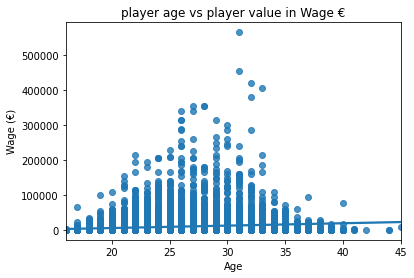

In [130]:
# look at the age and player value using scatter plot
sb.regplot(data = fifa19_df, x = 'Age', y = 'Wage');
plt.xlabel('Age')
plt.ylabel('Wage (€)')
plt.title('player age vs player value in Wage €');

###  the relationship is very week also and i suggest that by comparing the age and value in the same player overall range the correlation will apear

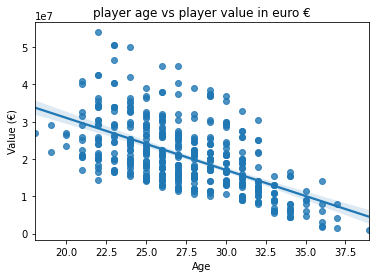

In [131]:
# comparing the age and player value which overall between 80 and 85
players_80_85=fifa19_df.query('Overall >= 80 & Overall <= 85')
sb.regplot(data = players_80_85, x = 'Age', y = 'Value');
plt.xlabel('Age')
plt.ylabel('Value (€)')
plt.title('player age vs player value in euro €');

### we can see that there is obvious negative correlation which makes since that for a player with the same overall but bigger age his value is less than the younger players with same overall

In [132]:
# creating new categorial column that contains overall ranges 
overall_ranges=[45,65,70,75,80,85,90,95]
overall_labels=['45-65','65-70','70-75','75-80','80-85','85-90','90-95']
fifa19_df['Overall_Ranges']=pd.cut(fifa19_df['Overall'],bins=overall_ranges,labels=overall_labels)
fifa19_df.head(3)

,Age,Value,Wage,Overall,Club,Position,Nationality,GKReflexes,StandingTackle,SlidingTackle,...,Balance,ShortPassing,SprintSpeed,Acceleration,Dribbling,Finishing,Crossing,ShotPower,Potential,Overall_Ranges
0,31,110500000,565000,94,FC Barcelona,RF,Argentina,8,28,26,...,95,90,86,91,97,95,84,85,94,90-95
1,33,77000000,405000,94,Juventus,ST,Portugal,11,31,23,...,70,81,91,89,88,94,84,95,94,90-95
2,26,118500000,290000,92,Paris Saint-Germain,LW,Brazil,11,24,33,...,84,84,90,94,96,87,79,80,93,90-95


### now by faceting by the category Overall_Ranges

                    correlation between age and value within different overall ranges


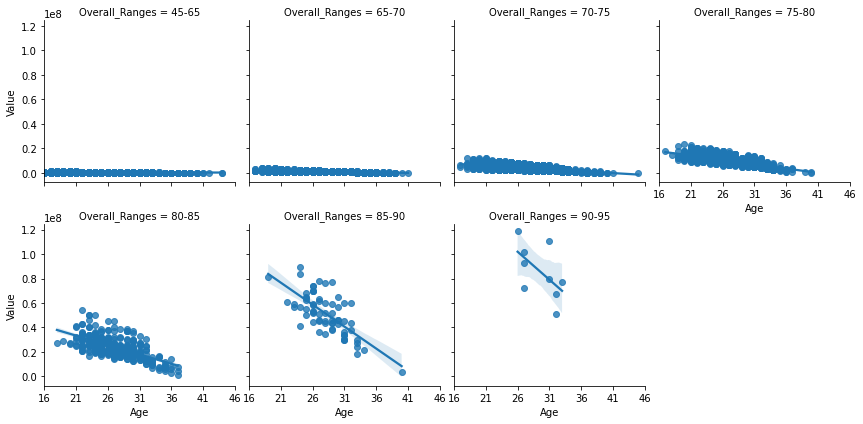

In [133]:
print('                    correlation between age and value within different overall ranges')
g = sb.FacetGrid(data = fifa19_df, col = 'Overall_Ranges', 
                margin_titles = True,col_wrap=4)
g.map(sb.regplot, 'Age', 'Value');
# adjusting the x-axis scale 
min_age=fifa19_df['Age'].min()
max_age=fifa19_df['Age'].max()
plt.xticks(np.arange(min_age,max_age +5, 5));


### we can see the negative correlation between age and value within different overall ranges 

                    correlation between age and wage within different overall ranges


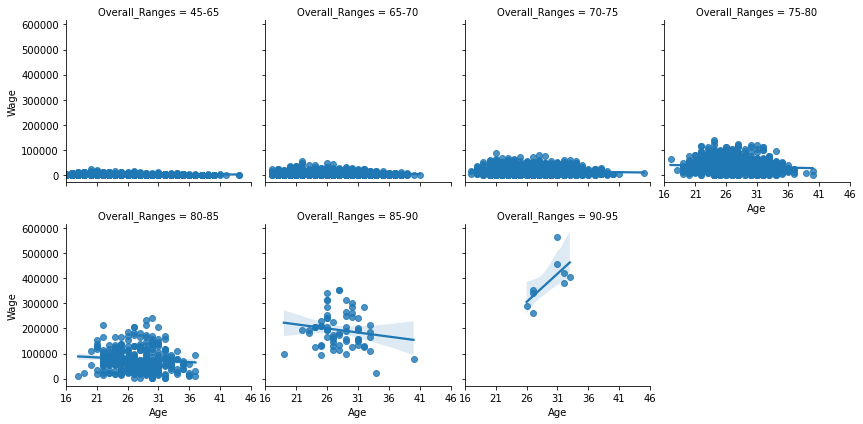

In [134]:
print('                    correlation between age and wage within different overall ranges')
g = sb.FacetGrid(data = fifa19_df, col = 'Overall_Ranges', 
                margin_titles = True,col_wrap=4)
g.map(sb.regplot, 'Age', 'Wage');
# adjusting the x-axis scale 
min_age=fifa19_df['Age'].min()
max_age=fifa19_df['Age'].max()
plt.xticks(np.arange(min_age,max_age +5, 5));


### the negative correlation between age and wage is weaker and the overall range between 90 and 95 has positive correlation between age and value ! , which makes sense because old players that are legends like ronaldo and messi their age doesent affect their wage because thery add big value to their teams with leading skills and experience

###  what is relation between player rating and his value and wage ?

In [135]:
# by grouping by the overall ranges with the players values mean
overall_groupby=fifa19_df.groupby(['Overall_Ranges'])['Value'].mean()
overall_groupby

Overall_Ranges
45-65    3.444349e+05
65-70    1.037087e+06
70-75    3.986337e+06
75-80    9.781119e+06
80-85    2.346866e+07
85-90    5.125000e+07
90-95    8.566667e+07
Name: Value, dtype: float64

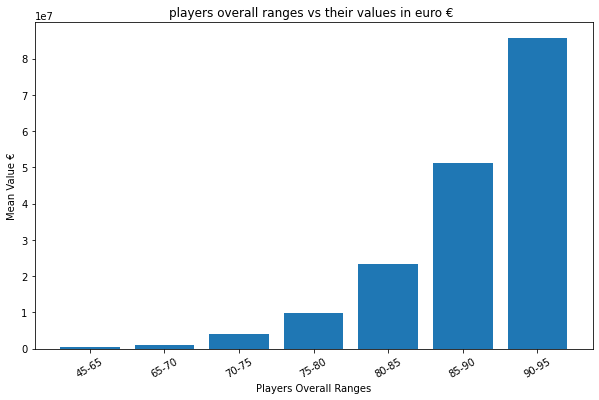

In [136]:
plt.figure(figsize=[10,6])
x=overall_groupby.index
y=overall_groupby
plt.bar(x,y)
plt.xlabel('Players Overall Ranges')
plt.ylabel('Mean Value €');
plt.xticks(rotation=30);
plt.title('players overall ranges vs their values in euro € ');

### as overall range increases the player value increases

In [137]:
overall_groupby2=fifa19_df.groupby(['Overall_Ranges'])['Wage'].mean()
overall_groupby2

Overall_Ranges
45-65      1969.321389
65-70      5663.652447
70-75     16005.765535
75-80     34769.163763
80-85     76794.029851
85-90    193485.294118
90-95    385555.555556
Name: Wage, dtype: float64

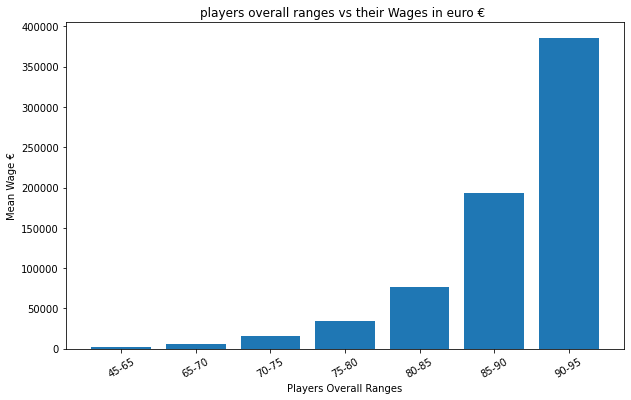

In [138]:
plt.figure(figsize=[10,6])
x2=overall_groupby2.index
y2=overall_groupby2
plt.bar(x2,y2)
plt.xlabel('Players Overall Ranges')
plt.ylabel('Mean Wage €');
plt.xticks(rotation=30);
plt.title('players overall ranges vs their Wages in euro € ');

### as overall range increases the player wage increases

###  relation between player position and different attributes ?

In [139]:
# grouping the position by the average speed
position_groupby=fifa19_df.groupby(['Position'])['SprintSpeed'].mean()
position_groupby=position_groupby.sort_values(ascending = True)
position_groupby

Position
GK     38.667169
CB     58.174458
RCB    59.142638
LCB    59.566719
CDM    61.177350
RDM    62.926829
LDM    63.062762
CM     64.628903
RCM    65.669251
LCM    66.059126
CAM    68.854430
ST     69.589202
CF     71.851351
LB     71.933333
RB     72.542587
LS     72.936893
RS     73.383085
RF     73.562500
RWB    73.574713
LAM    74.047619
LWB    74.217949
RAM    74.904762
LF     75.066667
LM     75.817680
RM     76.291741
LW     76.668449
RW     77.008219
Name: SprintSpeed, dtype: float64

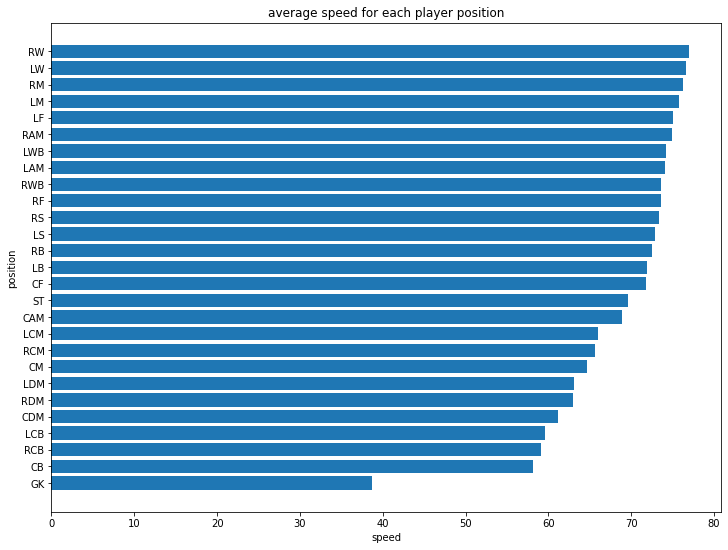

In [140]:
plt.figure(figsize=[12,9])
plt.barh(position_groupby.index,position_groupby)
plt.title('average speed for each player position')
plt.ylabel('position')
plt.xlabel('speed')
plt.show()


### it makes a lot of sense that the wingers( RW ,LW ,LM ,RM ) have more speed than other positions

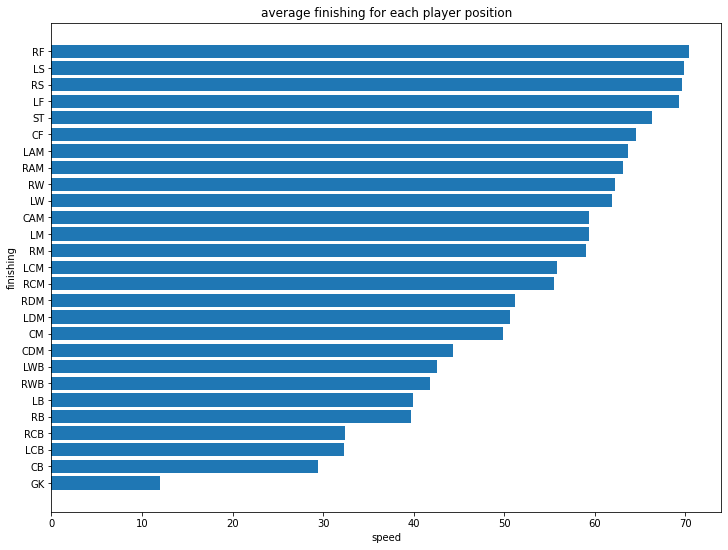

In [141]:
# grouping the position by the average finishing
finishing_groupby=fifa19_df.groupby(['Position'])['Finishing'].mean()
finishing_groupby=finishing_groupby.sort_values(ascending = True)
plt.figure(figsize=[12,9])
plt.barh(finishing_groupby.index,finishing_groupby)
plt.title('average finishing for each player position')
plt.ylabel('finishing')
plt.xlabel('speed')
plt.show()


### it makes sense that strikers are the ones with higher finishing

### Question 5 : does african players are the fastest in fifa19 ?

In [142]:
# first we will remove the countries which have less than 30 players so that we can take the average speed on enogth players
nation_counts=fifa19_df['Nationality'].value_counts(ascending=False)
fifa19_df2=fifa19_df.copy()
for nation in nation_counts[nation_counts<30].index:
    nation_index=fifa19_df2[ fifa19_df2['Nationality'] == nation ].index
    fifa19_df2.drop(nation_index, inplace = True)
    
nation_counts2=fifa19_df2['Nationality'].value_counts(ascending=False)   
nation_counts2    


England       1657
Germany       1195
Spain         1071
Argentina      935
France         911
              ... 
Jamaica         32
Ecuador         31
Guinea          31
Peru            30
Costa Rica      30
Name: Nationality, Length: 65, dtype: int64

### now lets group nations by their mean players speed and gety the top 10

In [143]:
nation_groupby=fifa19_df2.groupby(['Nationality'])['SprintSpeed'].mean()
nation_groupby=nation_groupby.reset_index()
top10_speed=nation_groupby.nlargest(10,['SprintSpeed'],keep='all')
top10_speed

,Nationality,SprintSpeed
38,Nigeria,75.735537
23,Ghana,74.464912
16,DR Congo,74.173077
28,Ivory Coast,72.648352
33,Mali,72.139535
29,Jamaica,71.968750
8,Cameroon,71.352273
25,Guinea,70.903226
18,Ecuador,70.419355
50,Senegal,70.238462


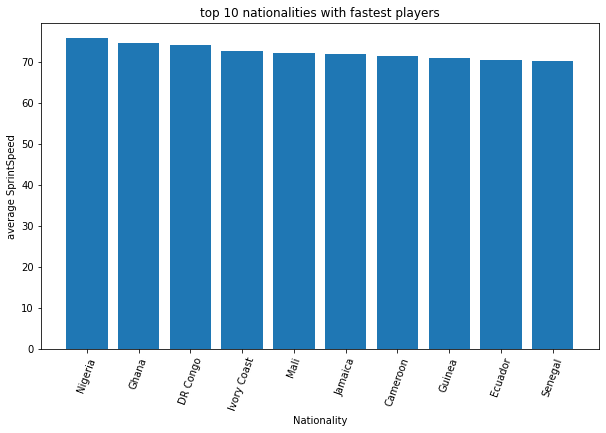

In [144]:
plt.figure(figsize=[10,6])
plt.bar(top10_speed['Nationality'], top10_speed['SprintSpeed'])
plt.xlabel('Nationality')
plt.ylabel('average SprintSpeed')
plt.xticks(rotation=70);
plt.title('top 10 nationalities with fastest players');


### african players are the fastest !

### what are the top 10 teams based on their average players rating

In [145]:
groupby_club=fifa19_df.groupby(['Club'])['Overall'].mean()
groupby_club=groupby_club.reset_index()
top10_clubs=groupby_club.nlargest(10,['Overall'],keep='all')
top10_clubs

,Club,Overall
325,Juventus,82.280000
397,Napoli,80.000000
314,Inter,79.750000
469,Real Madrid,78.242424
381,Milan,78.074074
211,FC Barcelona,78.030303
434,Paris Saint-Germain,77.433333
481,Roma,77.423077
374,Manchester United,77.242424
213,FC Bayern München,77.000000


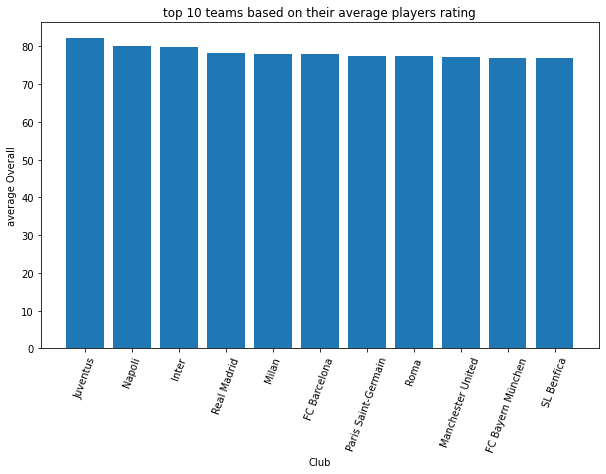

In [146]:
plt.figure(figsize=[10,6])
plt.bar(top10_clubs['Club'], top10_clubs['Overall'])
plt.xlabel('Club')
plt.ylabel('average Overall')
plt.xticks(rotation=70);
plt.title('top 10 teams based on their average players rating');

## Multivariate Explorations

## relationship between player age and potential within different overall values ?

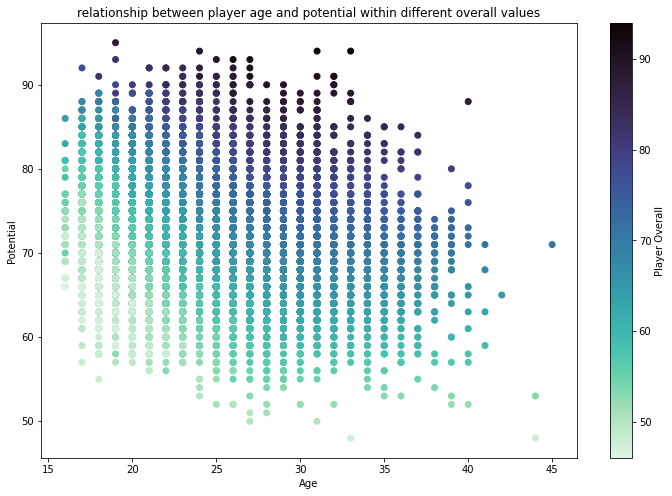

In [147]:
plt.figure(figsize=[12,8])
plt.scatter(data = fifa19_df, x = 'Age', y = 'Potential', c = 'Overall',
            cmap = 'mako_r')
cbar=plt.colorbar()
plt.xlabel('Age');
plt.ylabel('Potential');
plt.title('relationship between player age and potential within different overall values')
cbar.ax.set_ylabel('Player Overall');


### we can see that there is negative correlation between age and player potential which is logic and for players with higher overall ratings they have higher potential

## compare between players with same overall range and their wage in two different big clubs?

In [148]:
df_comp=fifa19_df[(fifa19_df['Club']=='Real Madrid') | (fifa19_df['Club']=='Paris Saint-Germain') ]
df_comp=df_comp.groupby(['Club','Overall_Ranges'])['Wage'].mean()
df_comp=df_comp.reset_index()
df_comp

,Club,Overall_Ranges,Wage
0,Paris Saint-Germain,45-65,6666.666667
1,Paris Saint-Germain,65-70,15000.000000
2,Paris Saint-Germain,70-75,NaN
3,Paris Saint-Germain,75-80,60000.000000
4,Paris Saint-Germain,80-85,86125.000000
5,Paris Saint-Germain,85-90,135400.000000
6,Paris Saint-Germain,90-95,290000.000000
7,Real Madrid,45-65,13000.000000
8,Real Madrid,65-70,26000.000000
9,Real Madrid,70-75,46000.000000


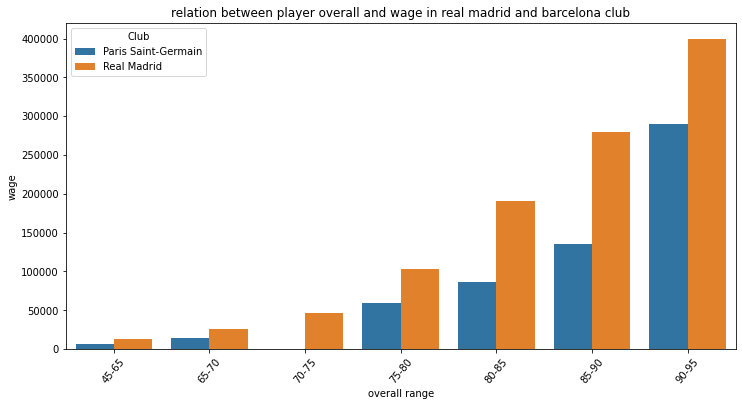

In [149]:
plt.figure(figsize=[12,6])
sb.barplot(data = df_comp, x = 'Overall_Ranges', y='Wage',hue = 'Club');
plt.xlabel('overall range')
plt.ylabel('wage');
plt.title('relation between player overall and wage in real madrid and barcelona club')
plt.xticks(rotation=50);

### real madrid pays more to players in same overall range than Paris Saint Germain   

## Conclusions
### players with the same overall rating but higher age generally has lower value and wage than the younger ones
### players with higher overall rating have higher value and wage 
### their is a very high gap between wages of some players in big clubs like real madrid
### player attributes depend on players positions for example players with winger position usually has higher speed 
### african players does not have the highest overall but they have the highest speed 
### players potential is directly proportional with both their overall and age 
### some players with same overall are paid differently based on their club